# Twitter Sentiment Analysis

![Twitter Image](images/twitter.png)

In this demonstration, i'll create a Python script to perform a sentiment analysis of the Twitter activity of various news oulets, and to present the findings visually.

The goal will be to provide a visualized summary of the sentiments expressed in Tweets sent out by the following news organizations: 
- BBC
- CBS 
- CNN 
- Fox
- New York Times

## Libraries

In order to determine the sentiment of news organization tweets, we will use two libraries: VADER, and Tweepy.

VADER (Valence Aware Dictionary and sEntiment Reasoner) is a Python library that allows for sentiment analysis of text. It works by assigning a sentiment to each word, symbol, and emoticon in common parlance. By adding up the sentiment of each word in a passage, it can estimate the sentiment of the passage. The sentiment ranges from -1 (extremely negative) to 1 (extremely positive). It is "specifically attuned to sentiments expressed in social media, and works well on texts from other domains". The library can be found [here](https://github.com/cjhutto/vaderSentiment).

Tweepy is a wrapper for the twitter API, and will make it easier to interact with twitter data. Library and docs can be found [here](http://www.tweepy.org/).

You will also need to acquire an API key from Twitter [here](https://apps.twitter.com/).

## Methodology

1. Make a list of the above news organization's Twitter handles
2. Create a loop to iterate over Twitter handles, return 100 most recent tweets for each, and store in a dataframe
3. Plot a scatterplot of tweet sentiment over time
4. Plot a bar graph of average tweet sentiment over the last 100 tweets for each news organization
5. Put all data, including text of each tweet in a dataframe and export as CSV for storage

### Dependencies

In [1]:
import tweepy
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Set Up VADER and Tweepy

In [2]:
# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [3]:
# Twitter API Keys
consumer_key = "TWYIUgoYgwoHwef9s0eJGzWfe"
consumer_secret = "rgfSOHf0nSJUfNBNbno1jeoQH3yiEmN5S3zAb03xaFPorCTQPW"
access_token = "917817936739409920-w7WLJOSquIknp9QIAyGqf9PTBnoZpuI"
access_token_secret = "jIvGz1yfvgtBEOvBi0cmZTKlkmZ4m9M2qeaH46NLhAWEz"

In [4]:
# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)
#, parser=tweepy.parsers.JSONParser()

### Retrieve Tweets, Analyze Sentiment, and Store Data

In [5]:
# Set up empty dataframe
df = pd.DataFrame({"@BBCNews":'',
                   "@CBSNews":'',
                   "@CNN":'',
                   "@FoxNews":'',
                   "@nytimes":''}, index=[0])
df.head()

,@BBCNews,@CBSNews,@CNN,@FoxNews,@nytimes
0,,,,,


In [6]:
# Target User Accounts
target_user = ("@BBCNews", "@CBSNews", "@CNN", "@FoxNews", "@nytimes")

In [7]:
#comp = api.user_timeline(id='maxkparry')

In [8]:
# Loop through each user
for user in target_user:
    counter = 0
    # Loop through 100 tweets
    for status in tweepy.Cursor(api.user_timeline, id=user).items(100):
        # Extract text
        text = status.text
        # Run Vader Analysis on each tweet
        compound = analyzer.polarity_scores(text)["compound"]
        
        # Add each value to the dataframe
        df.set_value(counter, user, compound)
        # Increment counter
        counter = counter + 1
 

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:12: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  if sys.path[0] == '':


In [9]:
df.head()

,@BBCNews,@CBSNews,@CNN,@FoxNews,@nytimes
0,-0.4391,-0.6705,-0.6124,-0.3818,0.2023
1,0,-0.3612,0,-0.5574,0
2,0,-0.7184,0,0.4588,0
3,-0.3182,0,0.5719,0.4973,0.5719
4,0,0.34,0.0772,0,0.3818


### Plotting Sentiment

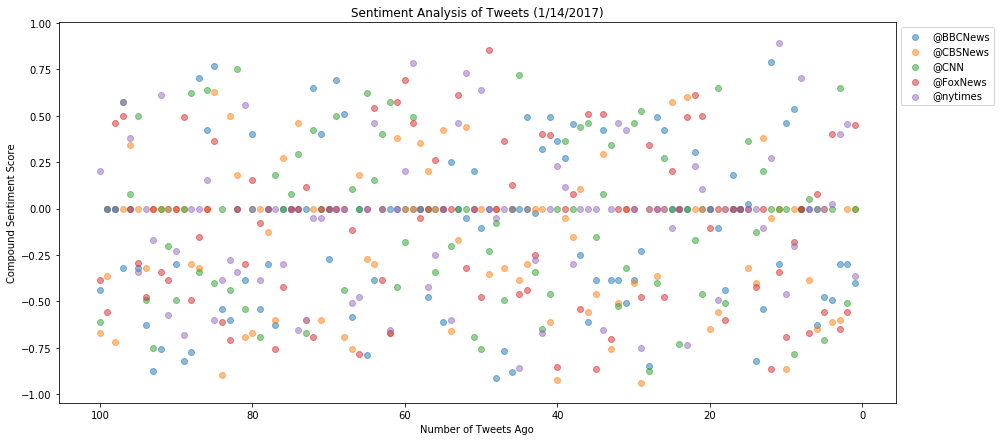

In [30]:
x = np.arange(100, 0, -1)
plt.figure(figsize=(15, 7))
a = plt.scatter(x, df['@BBCNews'], alpha=0.5)
b = plt.scatter(x, df['@CBSNews'], alpha=0.5)
c = plt.scatter(x, df['@CNN'], alpha=0.5)
d = plt.scatter(x, df['@FoxNews'], alpha=0.5)
e = plt.scatter(x, df['@nytimes'], alpha=0.5)
plt.title('Sentiment Analysis of Tweets (1/14/2017)')
plt.xlabel('Number of Tweets Ago')
plt.ylabel('Compound Sentiment Score')
plt.gca().invert_xaxis()
plt.legend((a,b,c,d,e),('@BBCNews', '@CBSNews','@CNN', '@FoxNews', '@nytimes'),numpoints=1, loc='upper right', ncol=1, fontsize=8)
lgd = plt.legend(bbox_to_anchor=(1, 1))
plt.savefig('output/Sentiment_Scatter.png', bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()

In [11]:
df2 = df.mean()

In [12]:
df2.head()

@BBCNews   -0.118099
@CBSNews   -0.162277
@CNN       -0.046518
@FoxNews   -0.086077
@nytimes   -0.044944
dtype: float64

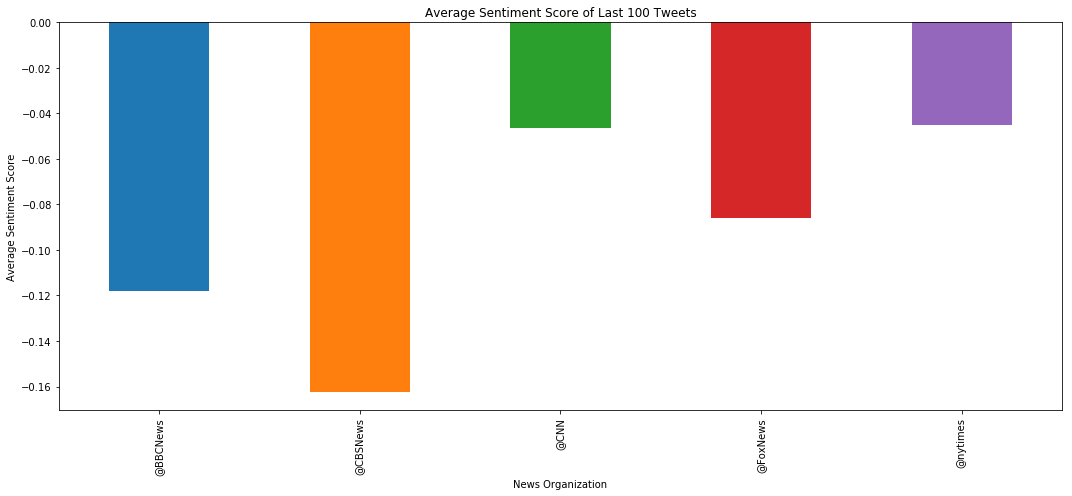

In [29]:
plt.figure(figsize=(15, 7))
df2.plot(kind='bar')
plt.title('Average Sentiment Score of Last 100 Tweets')
plt.xlabel('News Organization')
plt.ylabel('Average Sentiment Score')
plt.savefig('output/Average_Sentiment.png')
plt.tight_layout()
plt.show()

### Calling API and Storing Comprehensive Data

In [14]:
df3 = pd.DataFrame({"News_Source":'',
                    "Positive_Score":'',
                    "Negative_Score":'',
                    "Neutral_Score":'',
                    "Compound_Score":'',
                    "Tweets_Ago":'',
                    "Tweet_Text":'',
                    "Tweet_Date"}, index=[0])

In [15]:
# Target User Accounts
target_user = ("@BBCNews", "@CBSNews", "@CNN", "@FoxNews", "@nytimes")

In [16]:
# Loop through each user
counter = 0
for user in target_user:
    incrementer = 1
    # Loop through 100 tweets
    for status in tweepy.Cursor(api.user_timeline, id=user).items(100):
        # Extract text
        text = status.text
        date = status.created_at
        # Run Vader Analysis on each tweet
        positive = analyzer.polarity_scores(text)["pos"]
        negative = analyzer.polarity_scores(text)["neg"]
        neutral = analyzer.polarity_scores(text)["neu"]
        compound = analyzer.polarity_scores(text)["compound"]
        
        
        # Add each value to the dataframe
        df3.set_value(counter, "News_Source", user)
        df3.set_value(counter, "Positive_Score", positive)
        df3.set_value(counter, "Negative_Score", negative)
        df3.set_value(counter, "Neutral_Score", neutral)
        df3.set_value(counter, "Compound_Score", compound)
        df3.set_value(counter, "Tweets_Ago", incrementer)
        df3.set_value(counter, "Tweet_Text", text)
        df3.set_value(counter, "Tweet_Date", date)
        
        
        # Increment counter
        counter = counter + 1
        incrementer = incrementer + 1

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:17: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:18: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:19: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:20: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:21: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/anaconda/lib/python3.6/site-packages/ipykernel_launche

In [17]:
df3.head(500)

,Compound_Score,Negative_Score,Neutral_Score,News_Source,Positive_Score,Tweet_Text,Tweets_Ago
0,-0.4391,0.126,0.874,@BBCNews,0,RT @SallyBundockBBC: Apparently it’s #bluemond...,1
1,0,0,1,@BBCNews,0,Scottish Labour MP Hugh Gaffney 'heckled over ...,2
2,0,0,1,@BBCNews,0,Male work patterns see big shift to part-time ...,3
3,-0.3182,0.223,0.777,@BBCNews,0,Thousands struggle to access childcare on glit...,4
4,0,0,1,@BBCNews,0,"Scrap 'tens of thousands' migration target, MP...",5
5,-0.3182,0.299,0.513,@BBCNews,0.188,Women urged to share sexual harassment experie...,6
6,-0.6249,0.339,0.661,@BBCNews,0,Carillion crisis: Creditors due to hold Whiteh...,7
7,-0.875,0.6,0.4,@BBCNews,0,Man wanted over crossbow murder found dead htt...,8
8,-0.7579,0.481,0.519,@BBCNews,0,Cassie Hayes: Man charged with travel agent mu...,9
9,0,0,1,@BBCNews,0,RT @BBCSport: FT Liverpool 4-3 Man City \n\nIt...,10


### Export Data

In [18]:
df3.to_csv('output/last_100_tweets.csv', index=False)

In [21]:
print(status.created_at)

2018-01-14 07:11:36


### Conclusions

- Sentiment tends to be neutral overall, tending toward negative sentiment among all news organizations
- CNN has the least negative sentiment over the last 100 tweets
- CBS has the most negative sentiment over the last 100 tweets